In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [107]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [108]:
df = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [109]:
df.shape

(5572, 5)

In [110]:
# Data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [111]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [112]:
df = df.rename({'v1': 'target', 'v2': 'text'}, axis =1)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
def le(col):
    encoder = LabelEncoder()
    col = encoder.fit_transform(col)
    return col
df['target'] = le(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
df.isna().sum()

target    0
text      0
dtype: int64

In [115]:
df.duplicated().sum()

403

In [116]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

0

# EDA

In [117]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

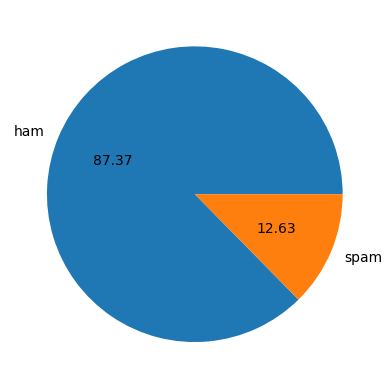

In [118]:
#data is imbalance
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [119]:
#Lets now get word count sentence count and character count
df['num_char'] =df['text'].apply(len)
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [120]:
#num of words
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [121]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [122]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


In [123]:
df[df['target'] == 0][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


In [124]:
df[df['target'] == 1][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


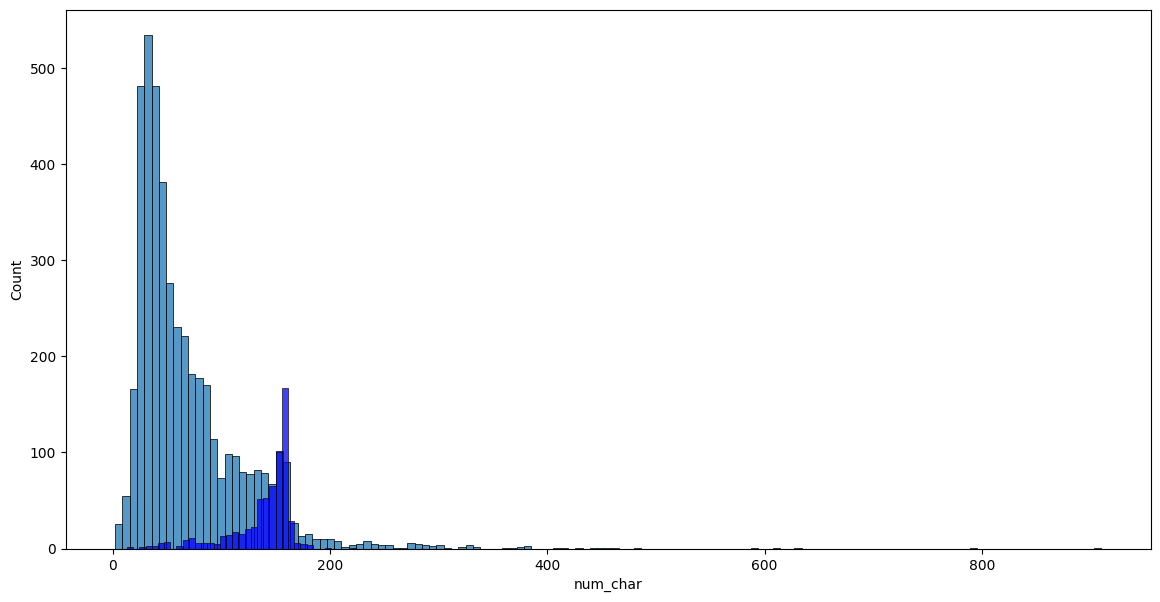

In [125]:
#for ham messages the average number of characters are less compared to spam
plt.figure(figsize=(14,7))
sns.histplot(df[df['target'] == 0]['num_char']) #ham
sns.histplot(df[df['target'] == 1]['num_char'], color = 'blue')#spam
plt.show()

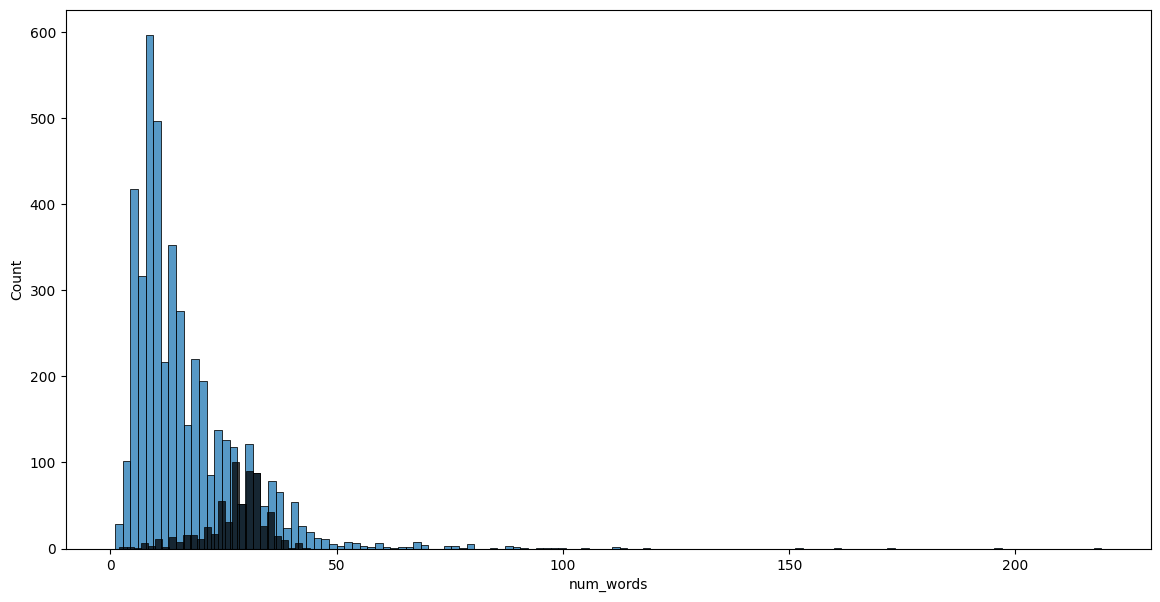

In [126]:
plt.figure(figsize=(14,7))
sns.histplot(df[df['target'] == 0]['num_words']) #ham
sns.histplot(df[df['target'] == 1]['num_words'], color = 'black')#spam
plt.show()

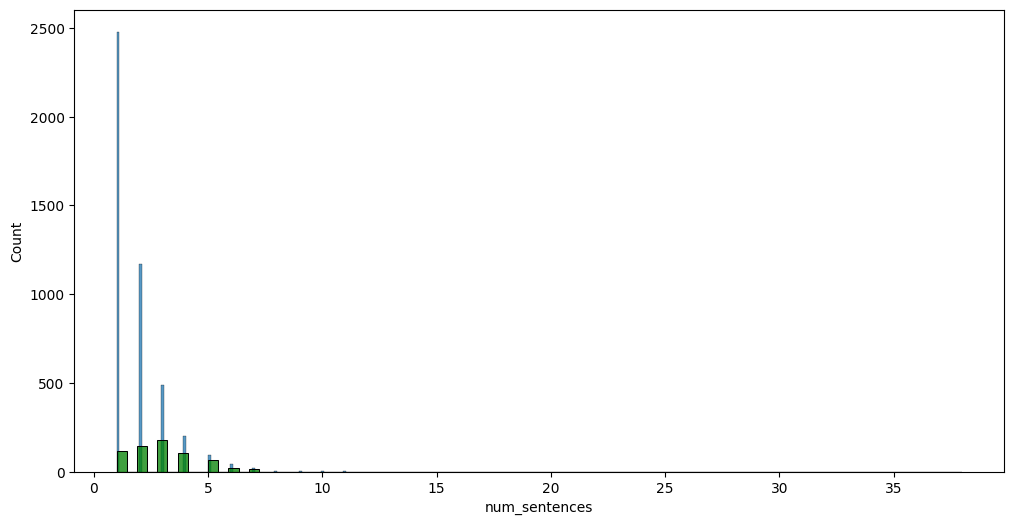

In [127]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences']) #ham
sns.histplot(df[df['target'] == 1]['num_sentences'], color = 'green')#spam
plt.show()

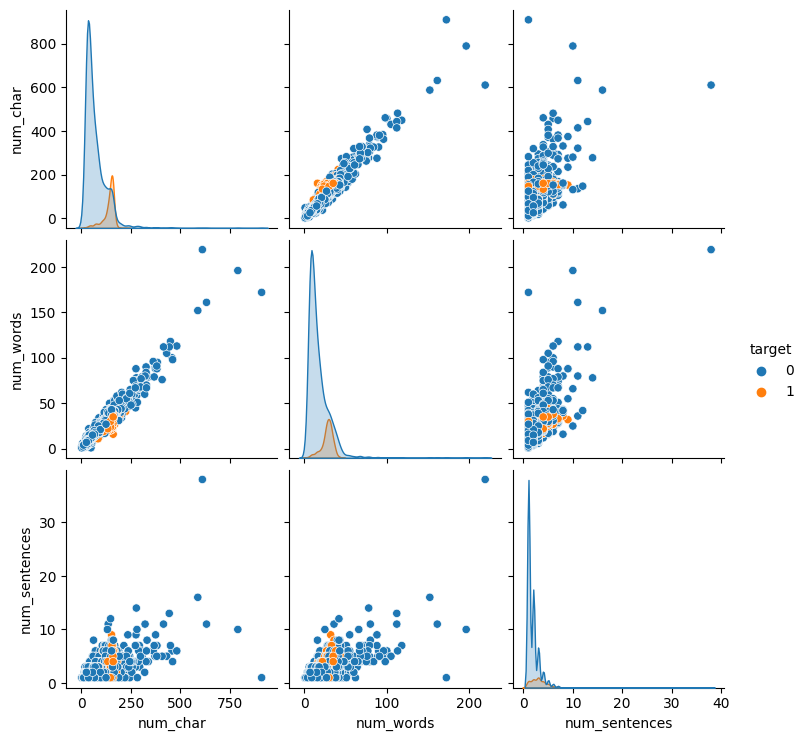

In [128]:
sns.pairplot(df, hue = 'target')

<Axes: >

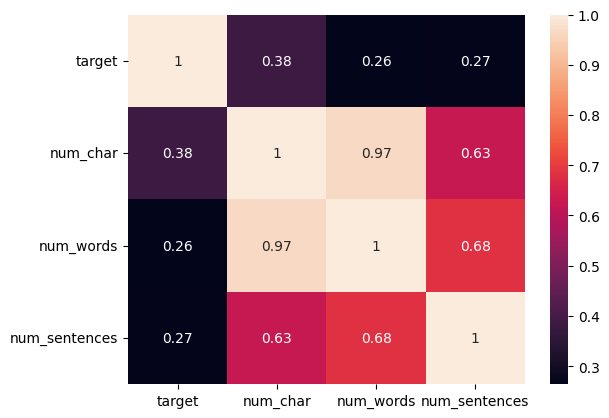

In [129]:
sns.heatmap(df[['target', 'num_char', 'num_words', 'num_sentences']].corr(), annot = True)

# DATA PREPROCESSING

In [130]:
txt = 'HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%'
txt = txt.lower()
txt

'hello how are you priyanshu? hope you doing fine! i like to do machine learning%'

In [131]:
#Tokeniztion divides sentence into list
txt = nltk.word_tokenize(txt)
txt

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 '?',
 'hope',
 'you',
 'doing',
 'fine',
 '!',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning',
 '%']

In [132]:
x = []
for i in txt:
    if i.isalnum():
        x.append(i)
x

['hello',
 'how',
 'are',
 'you',
 'priyanshu',
 'hope',
 'you',
 'doing',
 'fine',
 'i',
 'like',
 'to',
 'do',
 'machine',
 'learning']

In [133]:
# remove stopwords and punctuation:
txt = x[:]  #so list are immutable 
x.clear()
for i in txt:
    if i not in stopwords.words('english') and i not in string.punctuation:
        x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machine', 'learning']

In [134]:
txt = x[:]
x.clear()
for i in txt:
    ps = PorterStemmer()
    i = ps.stem(i)
    x.append(i)
x

['hello', 'priyanshu', 'hope', 'fine', 'like', 'machin', 'learn']

In [136]:
#Lets Create the Function
def tranform_text(text):
    text = text.lower()  #lower case
    text = nltk.word_tokenize(text)  # tokenization
    
    # removing Special Characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # remove stopwords and punctuation:
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    #Stemming
    for i in text:
        ps = PorterStemmer()
        y.append(ps.stem(i))
    return " ".join(y)

In [137]:
tranform_text('HELLO HOW ARE YOU PRIYANSHU? Hope you doing fine! I like to do machine Learning%')

'hello priyanshu hope fine like machin learn'

In [138]:
df['tranformed_text'] = df['text'].apply(tranform_text)
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


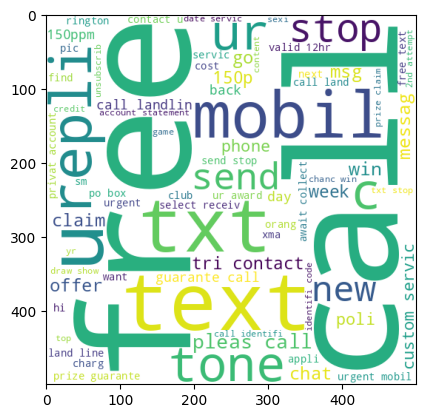

In [139]:
# Word cloud of spam messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
spam_wordcloud = wc.generate(df[df['target'] ==1]['tranformed_text'].str.cat(sep=" "))
plt.imshow(spam_wordcloud)

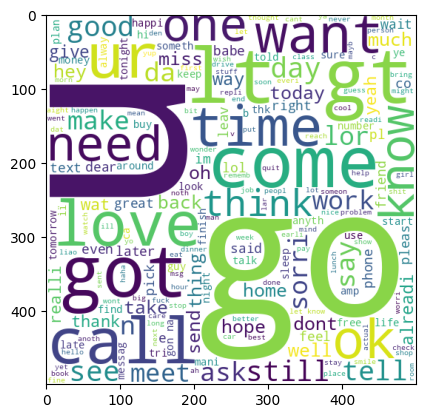

In [140]:
# Word cloud of ham messages it shows the important words in text
wc = WordCloud(width = 500, height=500, min_font_size=10, background_color = 'white')
ham_wordcloud = wc.generate(df[df['target'] ==0]['tranformed_text'].str.cat(sep=" "))
plt.imshow(ham_wordcloud)

In [141]:
#lets get top 30 words in sapm messages
spam_corpus = []
for msg in df[df['target']==1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9883

In [142]:
#this are top 30 words in spam
from collections import Counter
df_spam = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
df_spam

,Word,Frequency
0,call,320
1,free,189
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


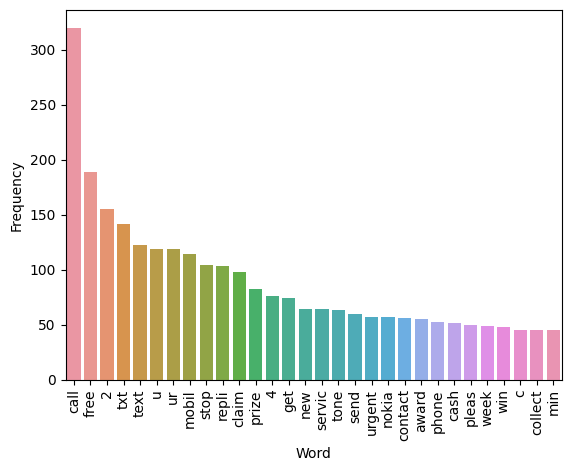

In [143]:
sns.barplot(x='Word', y='Frequency', data=df_spam)
plt.xticks(rotation = 'vertical')
plt.show()

In [144]:
#lets get top 30 words in ham messages now
ham_corpus = []
for msg in df[df['target']==0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

34771

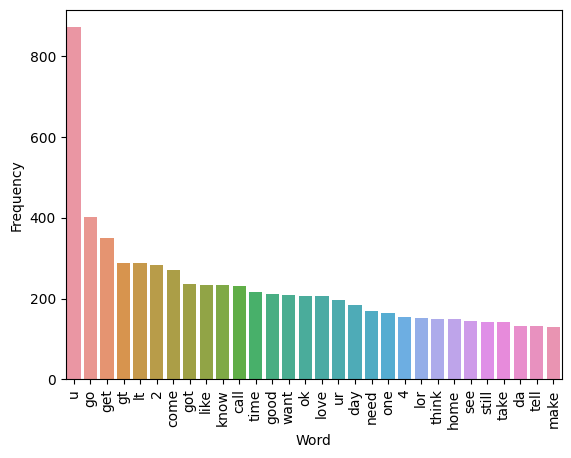

In [145]:
#this are top 30 words in ham
from collections import Counter
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=df_ham)
plt.xticks(rotation = 'vertical')
plt.show()

# MODEL BUILDING

In [147]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
cv = CountVectorizer()

In [148]:
df.head()

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [149]:
X_cv = cv.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [150]:
X_cv.shape

(5169, 6629)

In [151]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_cv, y, test_size =0.2, random_state = 2)

In [154]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score  
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [155]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.874274661508704

confusion matrix: 
[[786 110]
 [ 20 118]]

precision score:  0.5175438596491229


In [156]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.965183752417795

confusion matrix: 
[[872  24]
 [ 12 126]]

precision score:  0.84


In [157]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

accuracy Score:  0.9709864603481625

confusion matrix: 
[[893   3]
 [ 27 111]]

precision score:  0.9736842105263158


In [158]:
tfidf = TfidfVectorizer()
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [159]:
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [160]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred1))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred1))
print()
print("precision score: ", precision_score(y_test, y_pred1))

accuracy Score:  0.8704061895551257

confusion matrix: 
[[787 109]
 [ 25 113]]

precision score:  0.509009009009009


In [161]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred2))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred2))
print()
print("precision score: ", precision_score(y_test, y_pred2))

accuracy Score:  0.9593810444874274

confusion matrix: 
[[896   0]
 [ 42  96]]

precision score:  1.0


In [ ]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("accuracy Score: ", accuracy_score(y_test, y_pred3))
print()
print("confusion matrix: ")
print(confusion_matrix(y_test, y_pred3))
print()
print("precision score: ", precision_score(y_test, y_pred3))

# OTHER MODEL

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [163]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
#bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [164]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [165]:
tfidf = TfidfVectorizer(max_features = 3000) #our model is giving best accuracy for 3000 features and the precision stays 1
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_train, X_test, y_train, y_test= train_test_split(X_tf, y, test_size =0.2, random_state = 2)
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [166]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9342359767891683
Precision -  0.85
For  LR
Accuracy -  0.9574468085106383
Precision -  0.9519230769230769
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9831932773109243
For  GBDT
Accuracy -  0.9487427466150871
Precision -  0.9292929292929293
For  xgb
Accuracy -  0.9642166344294004
Precision -  0.9243697478991597


In [167]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
7,ETC,0.977756,0.983193
5,RF,0.971954,0.973913
0,SVC,0.974855,0.966667
4,LR,0.957447,0.951923
6,AdaBoost,0.964217,0.931624
8,GBDT,0.948743,0.929293
9,xgb,0.964217,0.924370
3,DT,0.934236,0.850000


In [168]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.972921
2,ETC,Accuracy,0.977756
3,RF,Accuracy,0.971954
4,SVC,Accuracy,0.974855
5,LR,Accuracy,0.957447
6,AdaBoost,Accuracy,0.964217
7,GBDT,Accuracy,0.948743
8,xgb,Accuracy,0.964217
9,DT,Accuracy,0.934236


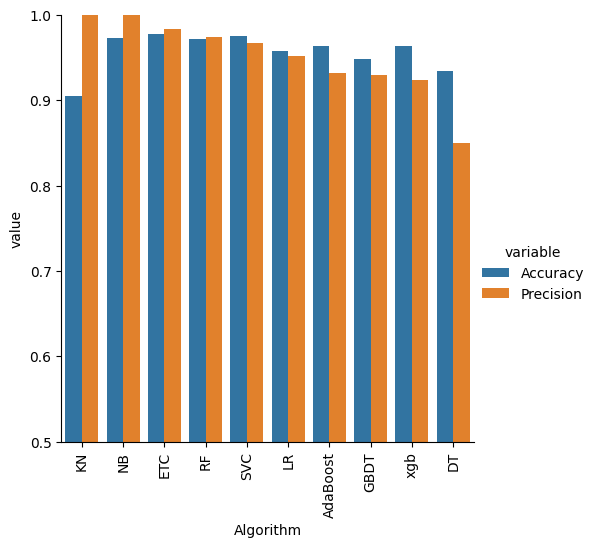

In [169]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [170]:
df

,target,text,num_char,num_words,num_sentences,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [171]:
X = df['tranformed_text']
y = df['target']

In [172]:
tfidf = TfidfVectorizer(max_features = 3000) #our model is giving best accuracy for 3000 features and the precision stays 1
X_tf = tfidf.fit_transform(df['tranformed_text']).toarray() #we convert into array cause we get the output in sparse array
X_train_tf, X_test_tf, y_train_tf, y_test_tf= train_test_split(X_tf, y, test_size =0.2, random_state = 2)

In [173]:
mnb = MultinomialNB()
mnb.fit(X_train_tf, y_train_tf)

MultinomialNB()

In [174]:
def predict(X_pred):
    X_pred = tranform_text(X_pred)
    X_pred = [X_pred] 
    X_tf = tfidf.transform(X_pred).toarray()  # Use transform instead of fit_transform
    predictions = mnb.predict(X_tf)
    if predictions == 1:
        print("The Message is Spam")
    else:
        print("The Message is not spam")

In [175]:
X_pred = input('Enter the Message: ')
predict(X_pred)

Enter the Message:  hii all of you


The Message is not spam
